# LD Tests #

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import leveldiagram as ld

## Basic 3-level diagrams ##

### Lambda ###

In [5]:
lambda_nodes = ((0),
                (1),
                (2, {'energy':-0.1}))
lambda_edges = ((0,1,{'detuning':0.1, 'label':'probe'}),
                (2,1,{'label':'couple', 'lw':4, 'arrowsize':0.2}))
lambda_graph = nx.DiGraph()
lambda_graph.add_nodes_from(lambda_nodes)
lambda_graph.add_edges_from(lambda_edges)

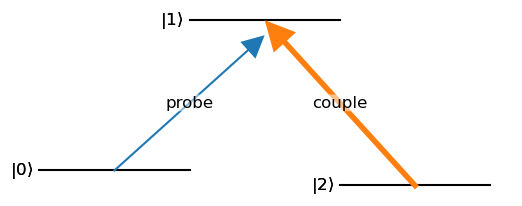

In [6]:
d = ld.LD(lambda_graph)
d.draw()
d.fig.savefig('lambda.png', bbox_inches='tight', dpi=150)

### Ladder ###

In [7]:
ladder_nodes = (0,1,2)
ladder_edges = ((0,1,{'label':'probe'}),
                (1,2,{'label':'couple'}))
ladder_graph = nx.DiGraph()
ladder_graph.add_nodes_from(ladder_nodes)
ladder_graph.add_edges_from(ladder_edges)

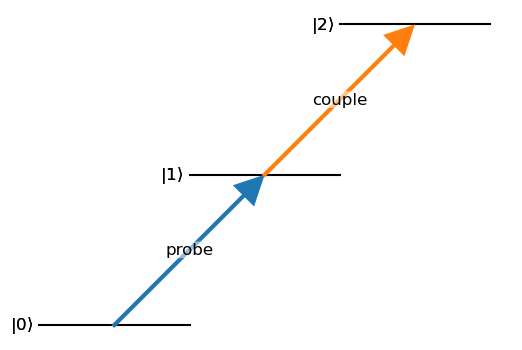

In [8]:
d = ld.LD(ladder_graph,
          coupling_defaults = {'arrowsize':0.2,'lw':3})
d.draw()

### Vee ###

In [9]:
v_nodes = ((0),
           (1,{'energy':1,'xpos':-1}),
           (2,{'energy':1, 'xpos':1}))
v_edges = ((0,1,{'label':'probe'}),
           (0,2,{'label':'couple'}))
v_graph = nx.DiGraph()
v_graph.add_nodes_from(v_nodes)
v_graph.add_edges_from(v_edges)

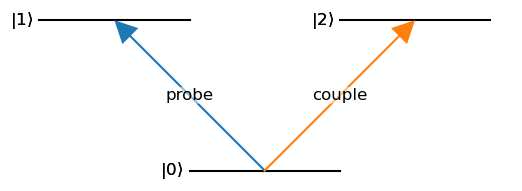

In [10]:
d = ld.LD(v_graph)
d.draw()

## Hyperfine Diagram ##

In [11]:
hf_nodes =  [((f,i), {('top' if f==2 else 'bottom') + '_text':'$m_F='+f'{i:d}'+'$',
                      'energy':f-1,
                      'xpos':i,
                      'width':0.75,
                      'text_kw':{'fontsize':'large'}})
             for f in [1,2]
             for i in range(-f,f+1)]
lin_couples = [((1,i),(2,i),{'label':l,'color':'C0',
                            'label_kw':{'fontsize':'medium','color':'C0'}})
               for i,l in zip(range(-1,2), ['1/2','2/3','1/2'])]
sp_couples = [((1,i),(2,i+1),{'label':l,'color':'C1',
                              'label_offset':'right',
                             'label_kw':{'fontsize':'medium','color':'C1'}})
              for i,l in zip(range(-1,2), ['1/6','1/2','1'])]
sm_couples = [((1,i),(2,i-1),{'label':l, 'color':'C2',
                              'label_offset':'left',
                             'label_kw':{'fontsize':'medium','color':'C2'}})
              for i,l in zip(range(-1,2), ['1','1/2','1/6'])]
hf_edges = lin_couples + sp_couples + sm_couples
hf_graph = nx.DiGraph()
hf_graph.add_nodes_from(hf_nodes)
hf_graph.add_edges_from(hf_edges)

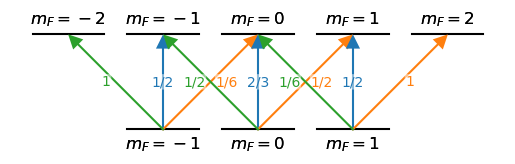

In [12]:
d = ld.LD(hf_graph, default_label = 'none')
d.ax.margins(y=0.2)
d.draw()
d.fig.savefig('hyperfine.png', bbox_inches='tight', dpi=150)

## 4-wave Mixing Diagram ##

In [13]:
fwm_nodes = ((0),
             (1,{'xpos':-1}),
             (2,{'xpos':1,'energy':1}),
             (3,{'energy':2,'xpos':0}))
fwm_edges = ((0,1),
             (1,3),
             (3,2),
             (2,0,{'label':'idler', 'wavy':True}))
fwm_graph = nx.DiGraph()
fwm_graph.add_nodes_from(fwm_nodes)
fwm_graph.add_edges_from(fwm_edges)

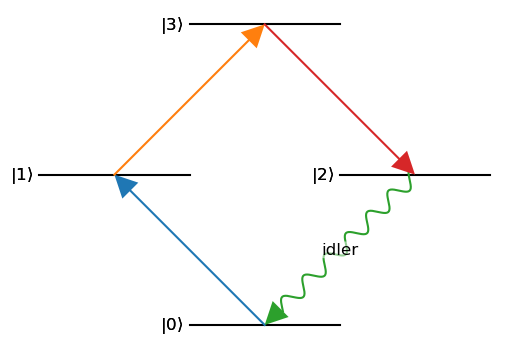

In [14]:
d = ld.LD(fwm_graph)
d.draw()

## Incorporation into a Larger Figure ##

In [15]:
bx_data = np.linspace(-10, 10, 51)
by_data = 3.2/(bx_data**2 + 2**2)

cx_data = np.linspace(0, 2*np.pi*10, 100)
cy_data = np.sin(cx_data)

Text(0, 0.5, 'Signal (arb.)')

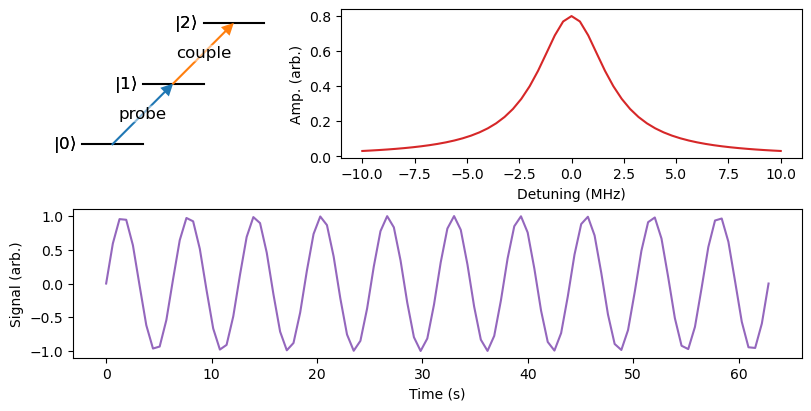

In [16]:
mosaic = [['a', 'b', 'b'],
          ['c', 'c', 'c']]

fig = plt.figure(figsize=(8,4), layout='constrained')
axs = fig.subplot_mosaic(mosaic)

### part a
d = ld.LD(ladder_graph, ax=axs['a'],
         coupling_defaults={'arrowsize':0.2})
d.draw()
axs['a'].set_aspect('equal')

### part b
axs['b'].plot(bx_data, by_data, color='C3')
axs['b'].set_xlabel('Detuning (MHz)')
axs['b'].set_ylabel('Amp. (arb.)')

### part c
axs['c'].plot(cx_data, cy_data, color='C4')
axs['c'].set_xlabel('Time (s)')
axs['c'].set_ylabel('Signal (arb.)')

In [17]:
ld.about()


        leveldiagram
    
leveldiagram Version: 0.1.0

        Dependencies
    
Python Version:       3.10.8
NumPy Version:        1.23.4
Matplotlib Version:   3.5.3
NetworkX Version:     2.8.4
